# Task 5 :- To explore Business Analytics

#### PROBLEM STATEMENT :-
Perform ‘Exploratory Data Analysis’ on the provided dataset
‘SampleSuperstore’. You are the business owner of the retail firm and want to see how your 
company is performing. You are interested in finding out the weak areas where you can work to
make more profit. What all business problems you can derive by looking into the data.
Data can be found at :-
https://drive.google.com/file/d/1lV7is1B566UQPYzzY8R2ZmOritTW299S/view

To get started with data analysis and preprocessing we need to to import some python libraries.

In [3]:
# Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import os

In [4]:
# Set the working directory
os.chdir('/home/abhishek/Downloads/')

In [5]:
# Load the data
df = pd.read_csv('SampleSuperstore.csv')
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [6]:
df.shape

(9994, 13)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [8]:
df.nunique()

Ship Mode          4
Segment            3
Country            1
City             531
State             49
Postal Code      631
Region             4
Category           3
Sub-Category      17
Sales           5825
Quantity          14
Discount          12
Profit          7287
dtype: int64

In [9]:
df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


### Missing value analysis

In [10]:
#Create dataframe with missing percentage
missing_val = pd.DataFrame(df.isnull().sum())
#Reset index
missing_val = missing_val.reset_index()
#Rename variable
missing_per = missing_val.rename(columns = {'index': 'Variables', 0: 'Missing_percentage'})
#Calculate percentage
missing_per['Missing_percentage'] = (missing_per['Missing_percentage']/len(df))*100
#descending order
missing_per = missing_per.sort_values('Missing_percentage', ascending = False).reset_index(drop = True)
missing_per

,Variables,Missing_percentage
0,Ship Mode,0.0
1,Segment,0.0
2,Country,0.0
3,City,0.0
4,State,0.0
5,Postal Code,0.0
6,Region,0.0
7,Category,0.0
8,Sub-Category,0.0
9,Sales,0.0


No missing values are present.

### Correlation analysis

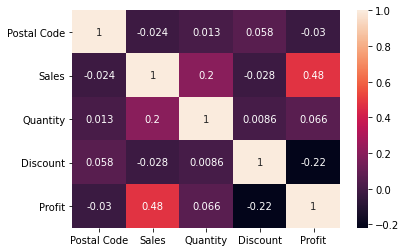

In [11]:
# Correlation between the data
sns.heatmap(df.corr(), annot=True);

### Visualisation

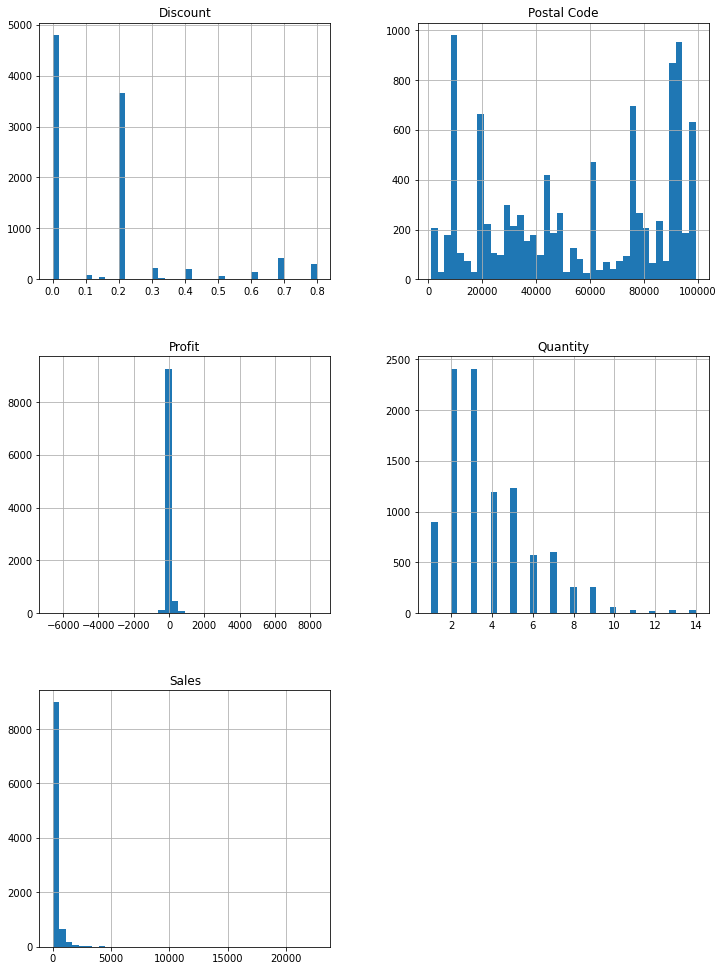

In [12]:
# Histogram
df.hist(figsize=(12,17),bins=40);

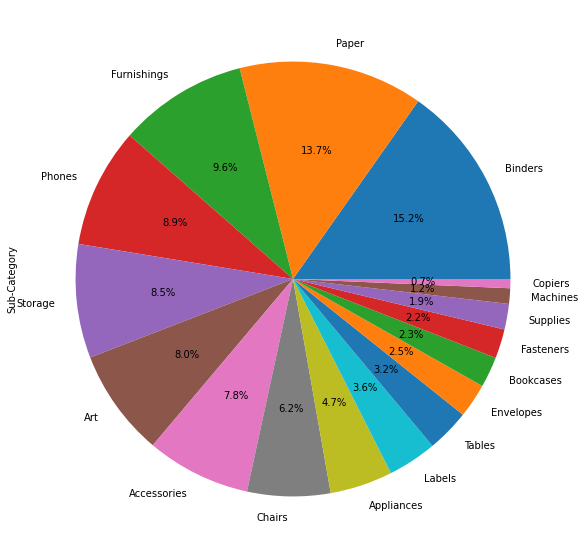

In [13]:
#DISTRIBUTION OF PRODUCTS

plt.figure(figsize=(12,10))
df['Sub-Category'].value_counts().plot.pie(autopct="%1.1f%%")

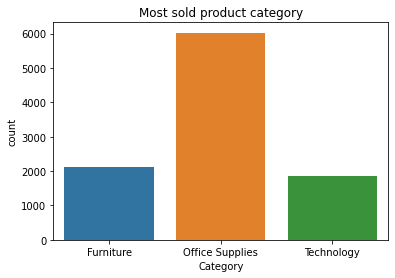

In [14]:
sns.countplot(x="Category", data=df).set_title("Most sold product category");

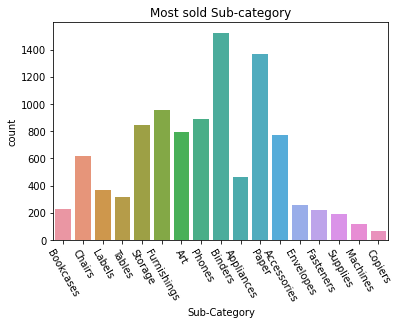

In [15]:
sns.countplot(x="Sub-Category", data=df).set_title("Most sold Sub-category");
plt.xticks(rotation=300);

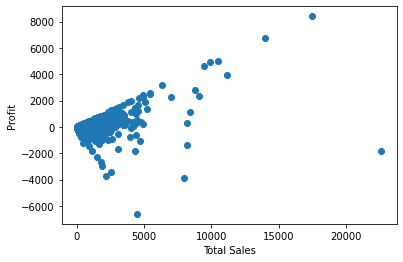

In [16]:
# Let's plot a relationship between sales and profit
plt.scatter(x=df['Sales'], y=df['Profit'])
plt.xlabel("Total Sales")
plt.ylabel("Profit")
plt.show()

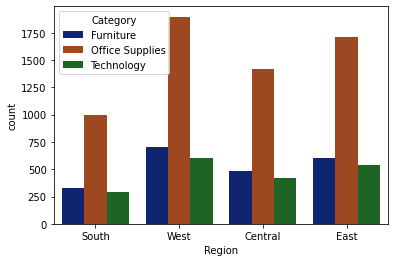

In [17]:
sns.countplot(x='Region',hue='Category',data=df,palette='dark')

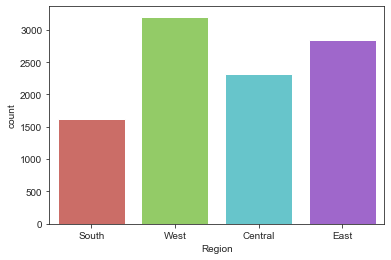

In [18]:
sns.set_style('ticks')
sns.countplot(x='Region',data=df,palette='hls');